# NOTE: If you are planning to use YAGMAIL for email alerts, please makes sure the relevant package has been installed/tested

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

if os.getcwd()[-7:] == 'AAM_Sim':
    print(os.getcwd())
else:
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    print(os.getcwd())

from CrossPlatformDev import my_print, join_str

import time
import psutil

from MonteCarlo.TwoAircraftEncounter.ScenarioMP import simulate_encounter

C:\Users\quekz\PycharmProjects\AAM_Sim


### Turn off warnings in Linux (AWS)... tqdm seems to have issues displaying correctly if there are many warnings. 

In [2]:
import warnings
import platform
if platform.system() == 'Linux':
    warnings.filterwarnings('ignore') # <---- hides warnings, makes tqdm work better.

In [3]:
import multiprocessing as mp
from tqdm.notebook import tqdm
import psutil
from MonteCarlo.TwoAircraftEncounter.ScenarioMP import simulate_encounter

Init_Param_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'Init_Param.csv')
data = pd.read_csv(Init_Param_Path)

data = data['Run'].unique()[0:5]  # <--- Returns a list (technically, in this case it's a pd.Series instance)

if __name__ == '__main__':
    start = time.time()
    with mp.Pool(processes = 2) as pool:
    # with mp.Pool(processes = psutil.cpu_count(logical=True)) as pool:
        results = list(tqdm(pool.imap(simulate_encounter, data), total = len(data)))
        pool.close()
        pool.join()
        results = pd.concat(results)
        end = time.time()
        
compute_time = end-start
simulated_flight_time_s = results['Total_Flight_Time'].sum()
speedup = simulated_flight_time_s/compute_time
print('Took %.3f seconds, simulated flight time is %.3f seconds, total speedup is %.3f times'%(end-start, 
                                                                                               simulated_flight_time_s, 
                                                                                               speedup))

results

  0%|          | 0/5 [00:00<?, ?it/s]

Took 323.698 seconds, simulated flight time is 750.408 seconds, total speedup is 2.318 times


,Run,AC1_NSE_Radial_Error_Mean,AC1_NSE_Radial_Error_Std,AC1_NSE_Mean_x,AC1_NSE_Mean_y,AC1_NSE_Mean_z,AC1_NSE_Std_x,AC1_NSE_Std_y,AC1_NSE_Std_z,AC2_NSE_Radial_Error_Mean,...,WC3d_Rel_Hor_Dist,WC3d_Rel_Vert_Dist,WC3e_Start_Time,WC3e_End_Time,WC3e_Detected,WC3e_Rel_Hdg_(Actual_Rad),WC3e_Rel_Hdg_(Desired_Track_Rad),WC3e_Rel_Vel_Hdg_(Actual_Rad),WC3e_Rel_Hor_Dist,WC3e_Rel_Vert_Dist
0,0,5.242277,2.334219,0.816360,2.711717,2.810604,3.444813,3.611531,2.283829,6.668753,...,323.222586,-4.291610,1.316667,27.637500,1,0.753850,0.557221,3.008762,324.492881,-3.897801
0,1,6.302210,2.086042,-3.061283,1.923337,0.441855,3.652885,4.201777,2.326090,6.116773,...,414.341028,-0.910492,1.741667,30.650000,1,0.443462,0.053001,2.405345,417.599157,-1.114835
0,2,7.978469,2.952421,0.693958,4.015823,0.472551,6.109860,4.293422,2.869520,7.242859,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
0,3,5.234949,3.012373,-2.782804,-2.990652,1.039609,2.776155,3.476139,3.271865,6.173447,...,107.806778,-3.702818,1.491667,14.995833,1,1.721182,1.595769,0.279122,107.950877,-3.544543
0,4,5.893459,2.883419,2.813165,2.998022,-0.222612,3.484384,3.742130,2.991557,6.195614,...,342.476678,-0.007096,0.891667,13.625000,1,0.600559,0.184995,2.552500,343.395956,-0.032728


In [4]:
results.columns

Index(['Run', 'AC1_NSE_Radial_Error_Mean', 'AC1_NSE_Radial_Error_Std',
       'AC1_NSE_Mean_x', 'AC1_NSE_Mean_y', 'AC1_NSE_Mean_z', 'AC1_NSE_Std_x',
       'AC1_NSE_Std_y', 'AC1_NSE_Std_z', 'AC2_NSE_Radial_Error_Mean',
       ...
       'WC3d_Rel_Hor_Dist', 'WC3d_Rel_Vert_Dist', 'WC3e_Start_Time',
       'WC3e_End_Time', 'WC3e_Detected', 'WC3e_Rel_Hdg_(Actual_Rad)',
       'WC3e_Rel_Hdg_(Desired_Track_Rad)', 'WC3e_Rel_Vel_Hdg_(Actual_Rad)',
       'WC3e_Rel_Hor_Dist', 'WC3e_Rel_Vert_Dist'],
      dtype='object', length=246)

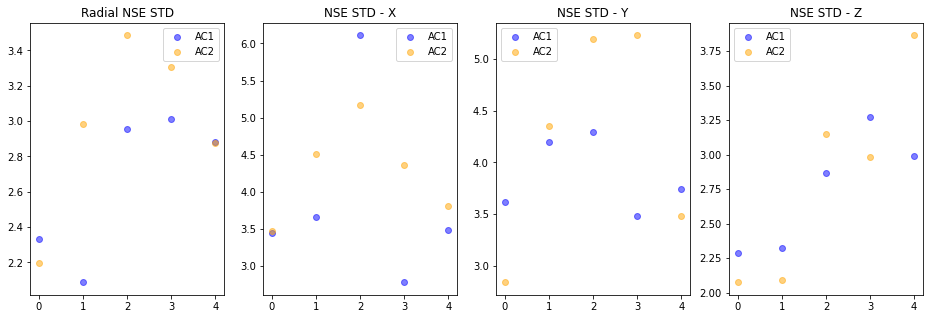

In [5]:
fig, axs = plt.subplots(ncols=4, figsize=(16,5))

axs[0].scatter(results['Run'], results['AC1_NSE_Radial_Error_Std'], label='AC1', color='b', alpha=0.5)
axs[0].scatter(results['Run'], results['AC2_NSE_Radial_Error_Std'], label='AC2', color='orange', alpha=0.5)
axs[0].set_title('Radial NSE STD')
axs[0].legend()

axs[1].scatter(results['Run'], results['AC1_NSE_Std_x'], label='AC1', color='b', alpha=0.5)
axs[1].scatter(results['Run'], results['AC2_NSE_Std_x'], label='AC2', color='orange', alpha=0.5)
axs[1].set_title('NSE STD - X')
axs[1].legend()

axs[2].scatter(results['Run'], results['AC1_NSE_Std_y'], label='AC1', color='b', alpha=0.5)
axs[2].scatter(results['Run'], results['AC2_NSE_Std_y'], label='AC2', color='orange', alpha=0.5)
axs[2].set_title('NSE STD - Y')
axs[2].legend()

axs[3].scatter(results['Run'], results['AC1_NSE_Std_z'], label='AC1', color='b', alpha=0.5)
axs[3].scatter(results['Run'], results['AC2_NSE_Std_z'], label='AC2', color='orange', alpha=0.5)
axs[3].set_title('NSE STD - Z')
axs[3].legend()

plt.show()

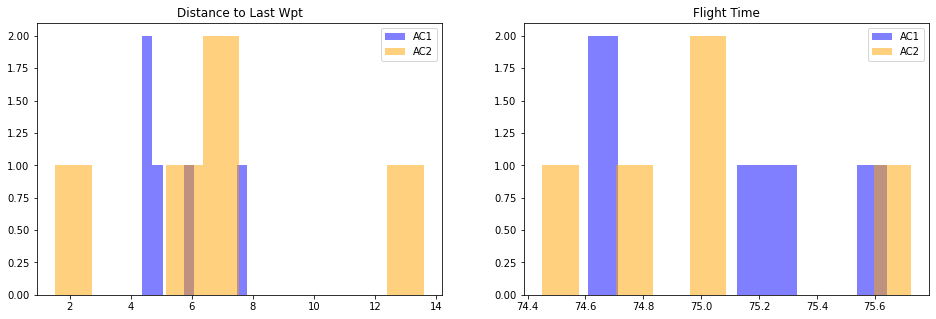

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(16,5))

axs[0].hist(results['AC1_Dist_to_Last_WPT'], color='b', alpha=0.5, label = 'AC1')
axs[0].hist(results['AC2_Dist_to_Last_WPT'], color='orange', alpha=0.5, label = 'AC2')
axs[0].set_title('Distance to Last Wpt')
axs[0].legend()

axs[1].hist(results['AC1_EndState_Time'], color='b', alpha=0.5, label = 'AC1')
axs[1].hist(results['AC2_EndState_Time'], color='orange', alpha=0.5, label = 'AC2')
axs[1].set_title('Flight Time')
axs[1].legend()

plt.show()

In [7]:
# Results_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'Results.csv')

# results.to_csv(Results_Path)